In [1]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.options.display.max_columns= None

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

**Objetivos**

- Buscar un conjunto de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

- Interpretación de los resultados.

In [2]:
df = pd.read_csv('datos/amazon_bestsellers.csv', index_col=0).reset_index()
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [3]:
#Cambiamos el nombre de las columnas

nuevas_col={col:col.replace(" ","_").lower() for col in df.columns}
df=df.rename(columns=nuevas_col)

>## EXPLICACIÓN DE LAS COLUMNAS 

- name:nombre del libro. No tiene orden

- author: nombre del autor. No tiene orden 

- user_rating:puntuación del libro según el lector.

- reviews: La cantidad de personas que han putnuado el libro.

- price: precio del libro

- year: año en el que se publica

- genre:Género del libro. Dicotómica (ficción/no) No tiene orden



In [4]:
df.info() # Por ahora, vemos que los tipos de datos nos sirven tal y como están. 
#Ya identificaremos más adelante si necesitamos codificar las columnas categóricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         550 non-null    object 
 1   author       550 non-null    object 
 2   user_rating  550 non-null    float64
 3   reviews      550 non-null    int64  
 4   price        550 non-null    int64  
 5   year         550 non-null    int64  
 6   genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.shape # Como el dataset organiza los 50 mejores, creemos que son los 50 mekjores de todos los datos. 

(550, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_rating,550.0,4.618364,0.226980,3.3,4.5,4.7,4.80,4.9
reviews,550.0,11953.281818,11731.132017,37.0,4058.0,8580.0,17253.25,87841.0
price,550.0,13.100000,10.842262,0.0,7.0,11.0,16.00,105.0
year,550.0,2014.000000,3.165156,2009.0,2011.0,2014.0,2017.00,2019.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
name,550,351,Publication Manual of the American Psychologic...,10
author,550,248,Jeff Kinney,12
genre,550,2,Non Fiction,310


In [8]:
freq=df.stb.freq(['author'])
freq.head(20)

,author,count,percent,cumulative_count,cumulative_percent
0,Jeff Kinney,12,2.181818,12,2.181818
1,Suzanne Collins,11,2.000000,23,4.181818
2,Rick Riordan,11,2.000000,34,6.181818
3,Gary Chapman,11,2.000000,45,8.181818
4,American Psychological Association,10,1.818182,55,10.000000
5,Gallup,9,1.636364,64,11.636364
6,Dr. Seuss,9,1.636364,73,13.272727
7,Rob Elliott,8,1.454545,81,14.727273
8,Stephenie Meyer,7,1.272727,88,16.000000
9,Stephen R. Covey,7,1.272727,95,17.272727


> Nos damos cuenta que para hacer el modelo de regresión logística, tendremos muchas columnas y va a tardar mucho en ejecutarse, por lo tanto, nos quedmaos solamente con los 10 autores más populares y eliminamos la columna de nombre del libro ya que no la utilizaremos para hacer la predicción.

In [9]:
list(freq.iloc[0:10,0])

['Jeff Kinney',
 'Suzanne Collins',
 'Rick Riordan',
 'Gary Chapman',
 'American Psychological Association',
 'Gallup',
 'Dr. Seuss',
 'Rob Elliott',
 'Stephenie Meyer',
 'Stephen R. Covey']

In [10]:
df= df[df['author'].isin(list(freq.iloc[0:10,0]))]
df=df.drop(['name'], axis=1)

In [11]:
df.head()

,author,user_rating,reviews,price,year,genre
38,Stephenie Meyer,4.6,9769,13,2009,Fiction
42,Jeff Kinney,4.8,4505,0,2011,Fiction
46,Suzanne Collins,4.7,22614,11,2010,Fiction
47,Suzanne Collins,4.7,22614,11,2011,Fiction
48,Suzanne Collins,4.7,22614,11,2012,Fiction


> Hemos visto que en la columna 'name' tenemos nombres de libros duplicados. Hemos considerado hacer una tabla de frecuencias para ver a qué se debe, ya que este dato no es tan asumible como que tengamos autores duplicados. Hemos observado que los duplicados son por los diferentes años en los que se han publicado los libros, considerando que estos datos son útiles a la hora de predecir, por lo que no los vamos a eliminar. 

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [14]:
# No tenemos ni nulos ni duplicados en este dataset, por lo que no debemos limpiarlo en este aspecto.

> Analizamos visualmente

In [15]:
numericas=df.select_dtypes(include='number')

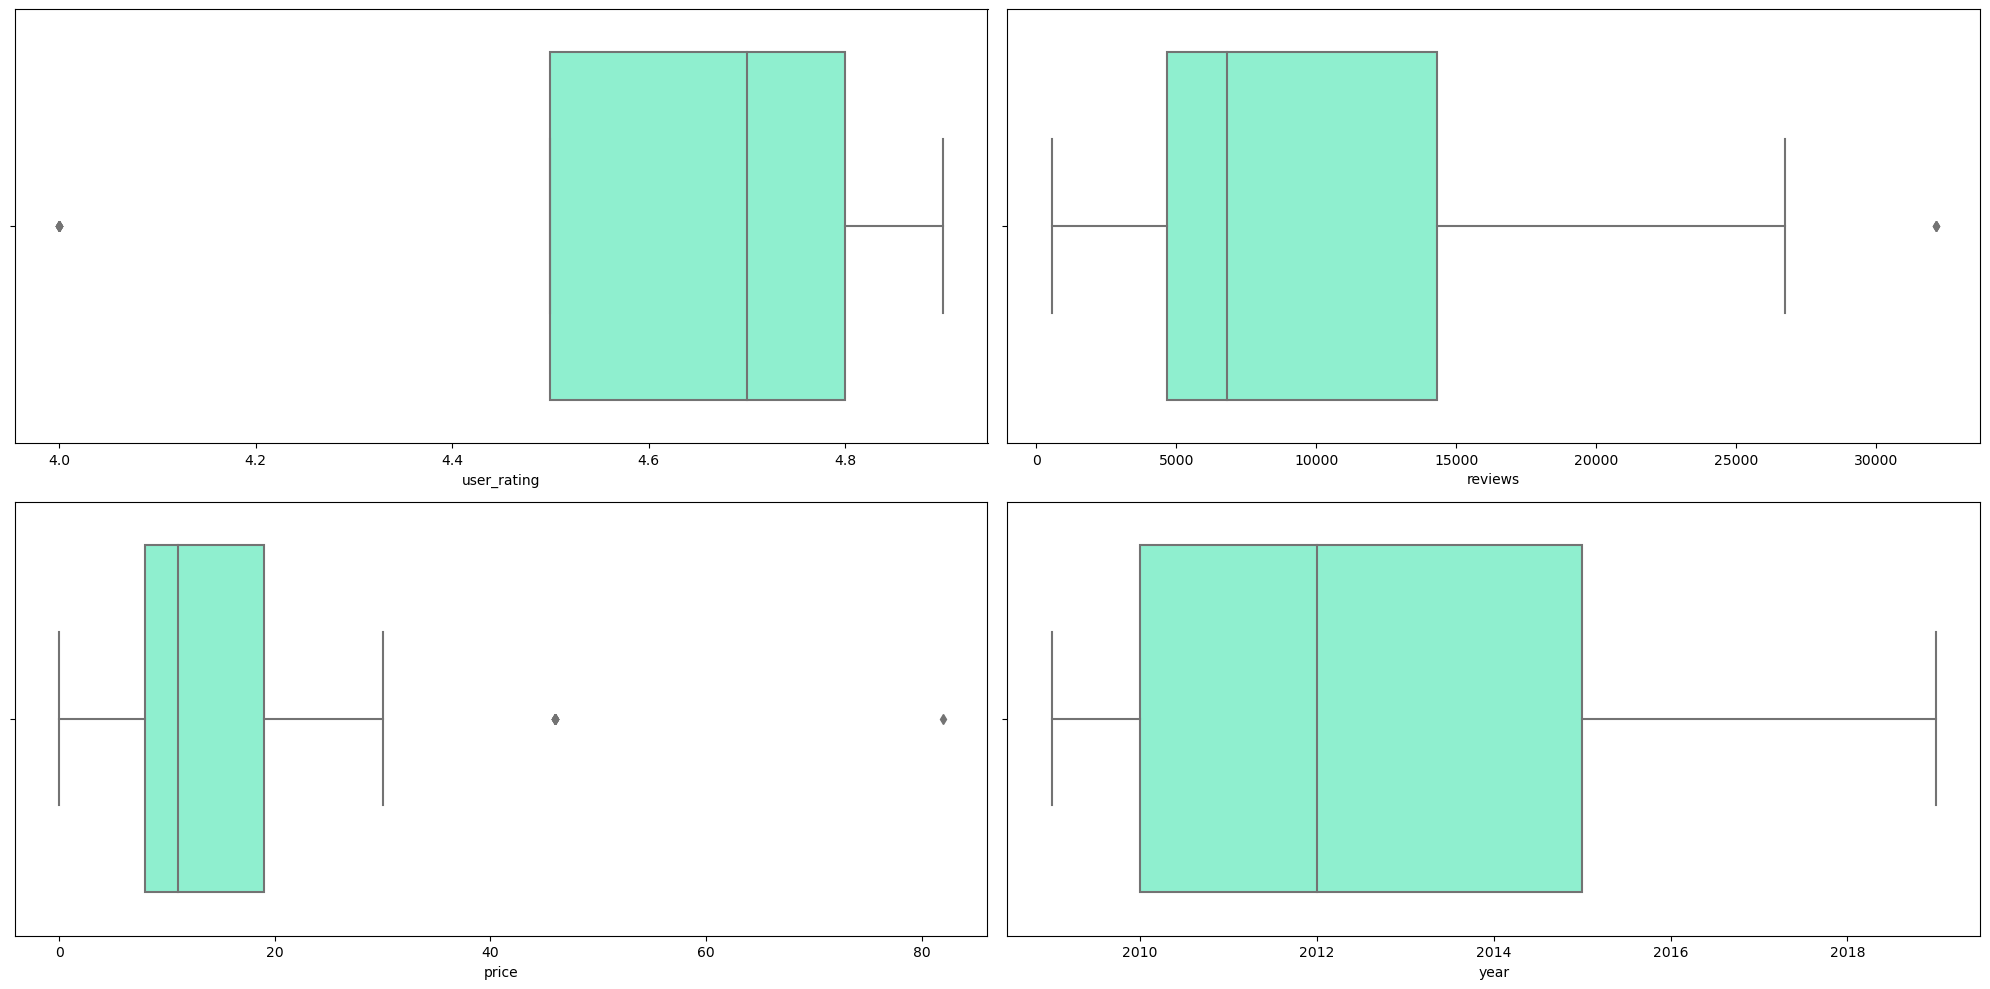

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()

plt.show()

In [17]:
# Vemos que tenemos bastantes outliers en 3 de las columnas, procedemos a sacar esos datos con una función.

> Outliers

In [18]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR

        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices

In [19]:
ind=detectar_outliers(list(numericas), df)
print(ind)

{'user_rating': [304, 305, 306, 307, 308, 309, 310, 311, 312], 'reviews': [407, 408, 409], 'price': [271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 473]}


In [20]:
for k, v in ind.items():
    median = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = median

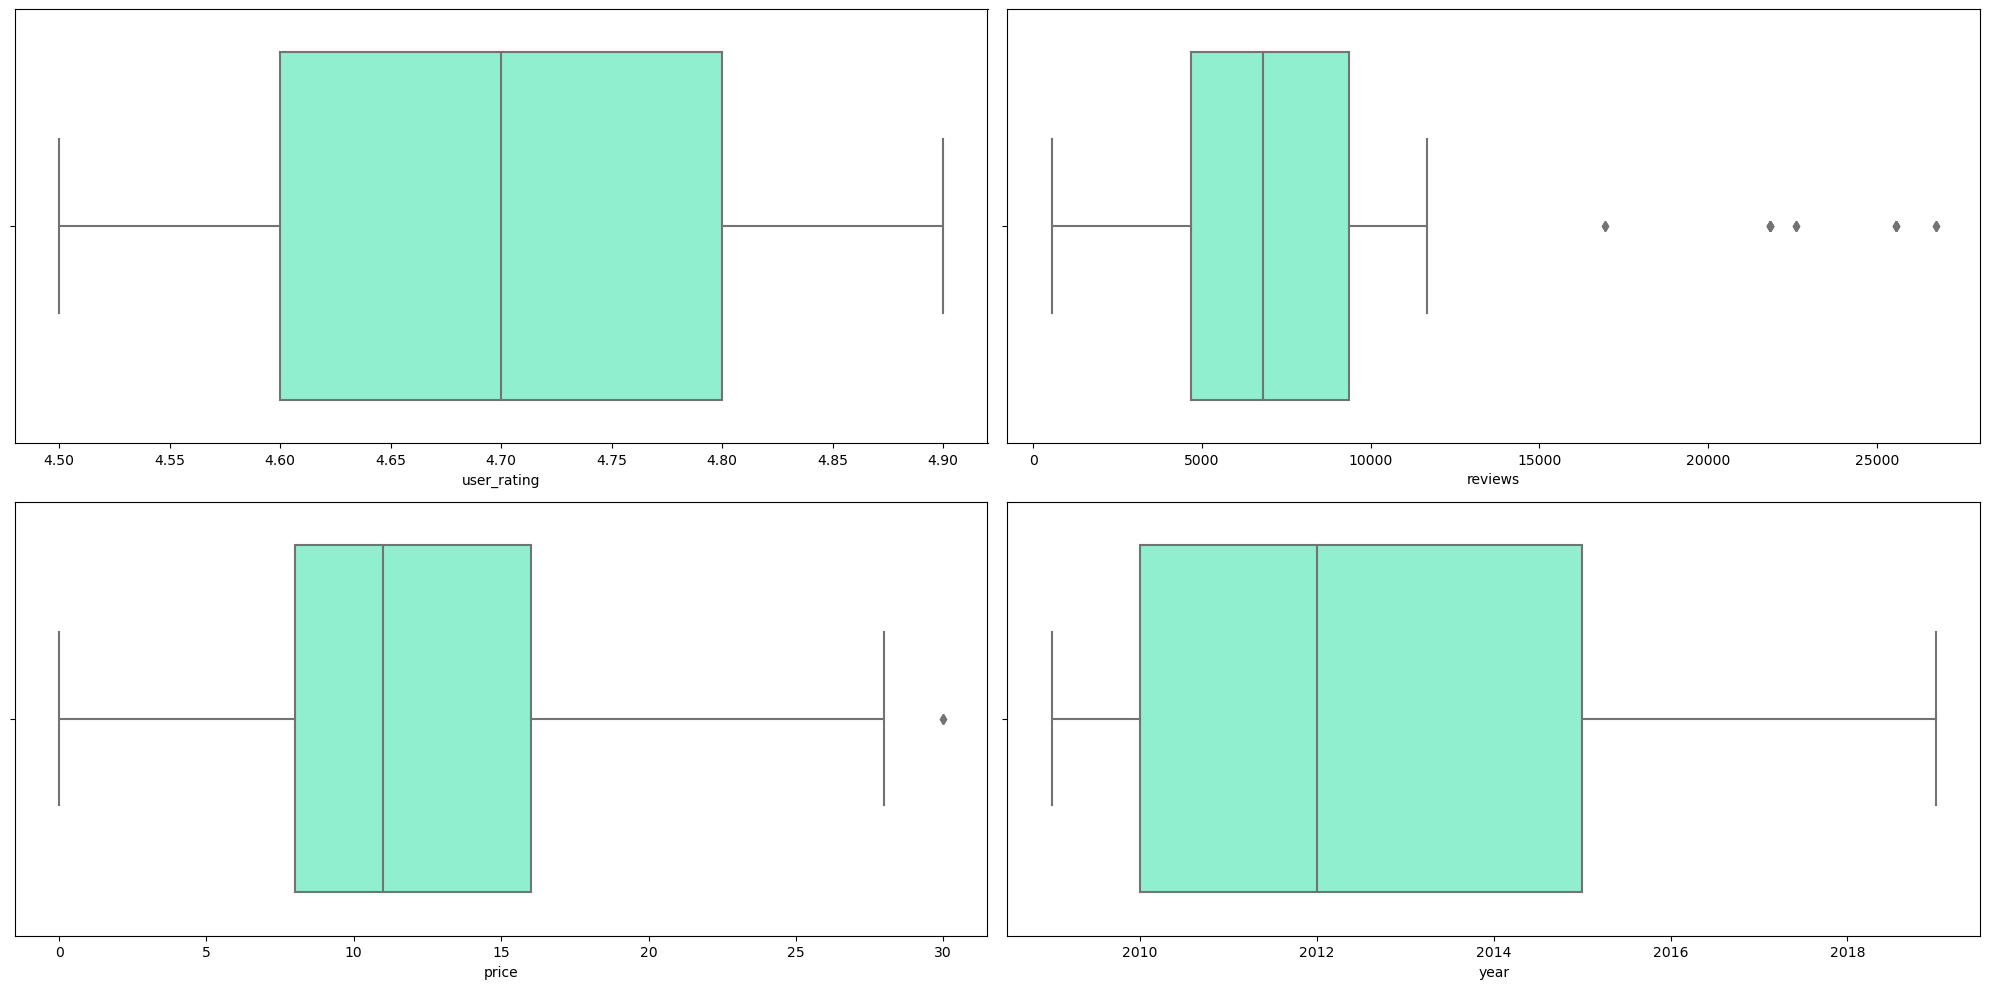

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()

plt.show()

In [22]:
numericas=df.select_dtypes(include='number')

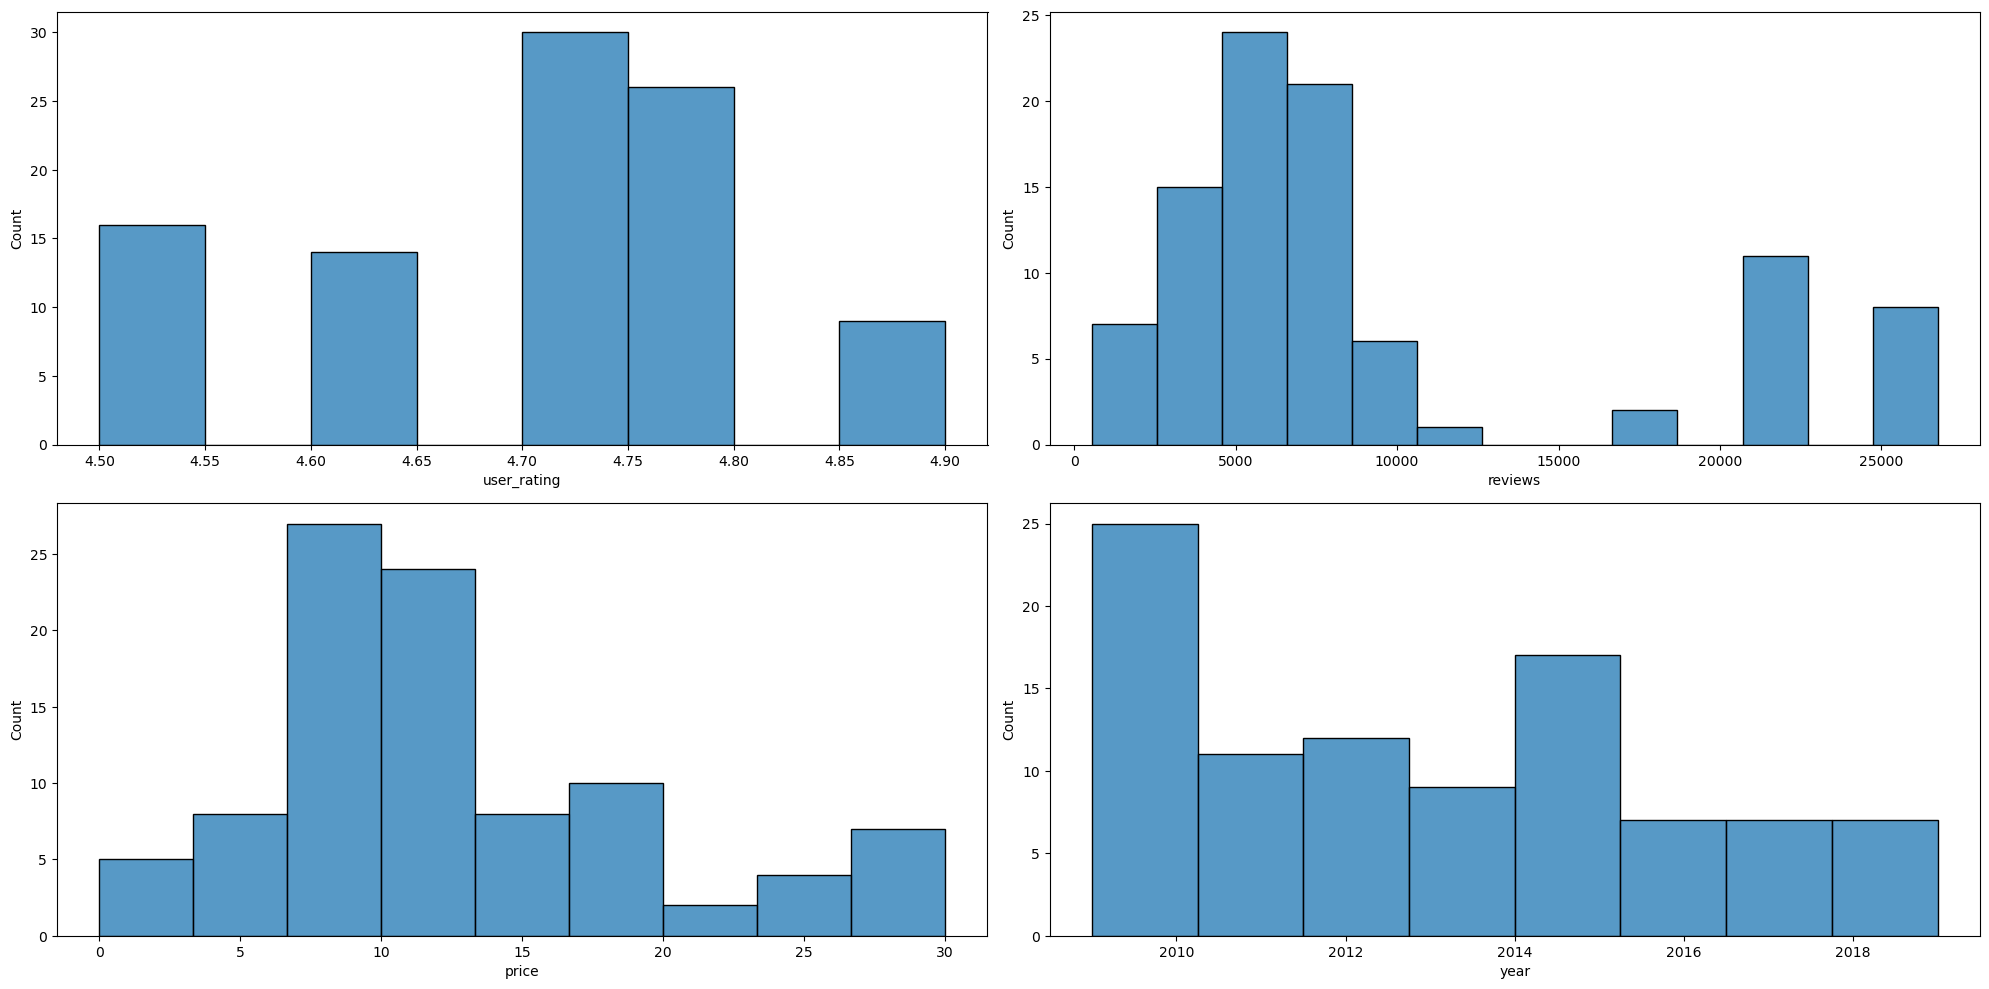

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.histplot(x = numericas[columna], data = df, ax=axes[indice]); # para trazar una línea de densidad
   
plt.tight_layout()

plt.show()

In [24]:
# No tenemos distribuciones normales, pero no es necesario para la regresión logística.

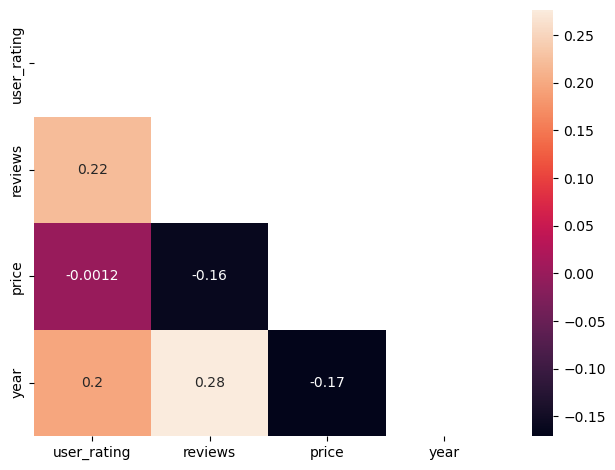

In [25]:
#Vemos la correlación entre las variables numericas

mask= np.triu(np.ones_like(df.corr(), dtype= np.bool_))
sns.heatmap(df.corr(), mask= mask, annot= True) #incorporamos la mascara

plt.tight_layout()
plt.show();

In [26]:
#Las correlaciones que obtenemos son débiles, aún así, encontramos positivas y negativas:
        #Positivas: Según aumenta el año, hay un mayor número de reviews y una mejor puntuación en los libros 
           #(suponemos que porque hay más lectores)

        #Negativas: En cuanto a las negativas, tienen demasiado poco peso para poder hacer una conclusión.

>Guardamos el dataset limpio

In [27]:
df.to_csv('datos/books_eda.csv')